## Import 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

## Data Load & Check Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,class2,class3,class4,re_registration,contest_award,nationality,inflow_route,whyBDA,what_to_gain,hope_for_group,previous_class_3,previous_class_4,previous_class_5,previous_class_6,previous_class_7,major_field,desired_career_path,completed_semester,project_type,time_input,desired_job,certificate_acquisition,desired_certificate,certificate_study_period,desired_job_except_data,incumbents_level,incumbents_lecture,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,contest_participitation,idea_contest,onedayclass_topic,withdrawal
0,TRAIN_0000,8,3e0057be3ecde495d1d6aab0bdc3092cce94440a6a4f68...,단일 전공,IT(컴퓨터 공학 포함),NaN,False,대학생,4,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",프로젝트 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,공학 (컴퓨터 공학 제외),취업,대학교 이수학기 4학기 이하,팀,4.5,데이터 엔지니어,없음,"SQLD, 정보처리기사",시험일 전 4주 (2/1 ~ 2/27),개발,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 많지 않아야 편하게 들을 수 있어서,삼성이나 하이닉스,AI,NaN,NaN,C++ 응용,1
1,TRAIN_0001,8,c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,4,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,IT (컴퓨터 공학 포함),취업,대학교 이수학기 5학기 이상,팀,2.0,인공지능 전문가,없음,"ADsP, SQLD, 빅데이터 분석 기사",시험일 전 4주 (2/1 ~ 2/27),AI,주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",10명 내외의 강의 리스너와 1명의 현직자,인원이 적어야 집중할 수 있고 질문 하기 쉽다.,네이버,AI,NaN,NaN,.,1
2,TRAIN_0002,8,1ed9296bd2a05ea36fabb5171a003b7320bb21a53d6135...,단일 전공,IT(컴퓨터 공학 포함),NaN,True,대학생,4,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,혼자 공부하기 어려워서,데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,IT (컴퓨터 공학 포함),취업,대학교 이수학기 4학기 이하,팀,3.0,데이터 분석가,없음,빅데이터 분석 기사,시험일 전 4주 (2/1 ~ 2/27),AI,시니어 (10년차 ~),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 소수인원은 조금 부담스럽고 너무 많은 인원은 집중도가 떨어질거같아서,스포츠분석 기업,AI,139ac02d03d83f839197195e65bc1810ef5282ade32d80...,NaN,C언어 기초,1
3,TRAIN_0003,8,5ec50ef5a0c0416652f8d67a89ef4c02eb0c6a61b5d0a8...,단일 전공,IT(컴퓨터 공학 포함),NaN,True,대학생,7,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,현직자의 강의를 듣고 싶어서,데이터 분석 역량,네. 온라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,자연과학,취업,대학교 이수학기 5학기 이상,팀,2.0,데이터 분석가,컴퓨터활용능력,"ADsP, SQLD, 빅데이터 분석 기사, 정보처리기사",시험일 전 4주 (2/1 ~ 2/27),AI,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 많은 인원이 있을 경우 집중도가 떨어질 거 같습니다.,토스,AI,NaN,NaN,현직자의 취업과정,0
4,TRAIN_0004,8,c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,7,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,혼자 공부하기 어려워서,공모전 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,"IT (컴퓨터 공학 포함), 인문학",취업,대학교 이수학기 5학기 이상,팀,1.5,데이터 분석가,SQLD,"ADsP, 빅데이터 분석 기사, 정보처리기사",시험일 전 4주 (2/1 ~ 2/27),개발,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),"국내 대기업 IT 계열 (금융, 제조 ...)",오프라인,100명 이상의 리스너와 10명 이상의 현직자,많은 현직자분들의 이야기를 듣고싶어서,네이버 카카오,금융,NaN,NaN,C언어,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1056 non-null   object 
 1   generation                       1056 non-null   int64  
 2   school1                          1056 non-null   object 
 3   major type                       1049 non-null   object 
 4   major1_1                         1051 non-null   object 
 5   major1_2                         493 non-null    object 
 6   major_data                       1056 non-null   bool   
 7   job                              1056 non-null   object 
 8   class1                           1056 non-null   int64  
 9   class2                           101 non-null    float64
 10  class3                           2 non-null      float64
 11  class4                           1 non-null      float64
 12  re_registration     

In [4]:
test.head()

,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,class2,class3,class4,re_registration,contest_award,nationality,inflow_route,whyBDA,what_to_gain,hope_for_group,previous_class_3,previous_class_4,previous_class_5,previous_class_6,previous_class_7,major_field,desired_career_path,completed_semester,project_type,time_input,desired_job,certificate_acquisition,desired_certificate,certificate_study_period,desired_job_except_data,incumbents_level,incumbents_lecture,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,contest_participitation,idea_contest,onedayclass_topic
0,TEST_0000,9,88fb2803503cc7db7e1e8caf8f4e1e5c517d0d8669fffa...,NaN,NaN,NaN,False,대학생,4,NaN,NaN,NaN,아니요,NaN,외국인,에브리타임,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,취업,NaN,팀,2.0,B. 데이터 분석가,없음,ADsP,접수일 전 5주,"B. 기획 / 전략 / 경영 직무, D. 소프트웨어 개발자",주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),해외 기업 (빅테크),온라인,3~50명 내외의 강의 리스너와 1명의 현직자,적당한 인원이 있어야 더 집중할 수 있어어,"유튜브, 인스타그램, 그린피스",C. 제조업,NaN,NaN,머신러닝 / 딥러닝 응용
1,TEST_0001,9,88fb2803503cc7db7e1e8caf8f4e1e5c517d0d8669fffa...,NaN,NaN,NaN,False,대학생,1,4.0,NaN,NaN,아니요,NaN,내국인,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,대학원 진학,NaN,팀,2.0,C. 데이터 사이언티스트,없음,"ADsP, SQLD, 빅데이터 분석 기사",시험일 전 4주,D. 소프트웨어 개발자,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),스타트업 C-level,온라인,3~50명 내외의 강의 리스너와 1명의 현직자,인원이 적어야 집중할 수 있어서,콕스웨이브,"R. 예술, 스포츠 및 여가관련 서비스업",NaN,NaN,"Python 응용, 데이터 시각화 (Matplotlib, Seaborn 등), 머신..."
2,TEST_0002,9,88fb2803503cc7db7e1e8caf8f4e1e5c517d0d8669fffa...,NaN,NaN,NaN,False,취준생,12,NaN,NaN,NaN,아니요,NaN,내국인,지인 추천,혼자 공부하기 어려워서,데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,취업,NaN,팀,3.0,"G. PM/서비스 기획자,",ADsP,"SQLD, sqld 시험 응시는 완료. 발표아직안남",시험일 전 3주,"A. 금융 / 보험 직무, B. 기획 / 전략 / 경영 직무",주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),"국내 대기업 IT 계열 (금융, 제조 ...)","온, 오프라인 동시",10명 내외의 강의 리스너와 1명의 현직자,인원이 적을수록 심도 깊은 정보를 얻을 수 있을 것 같아요,"하나카드, 국민카드, 신한카드, SK 등",K. 금융 및 보험업,NaN,NaN,"Python 응용, SQL 응용, 웹 크롤링"
3,TEST_0003,9,88fb2803503cc7db7e1e8caf8f4e1e5c517d0d8669fffa...,NaN,NaN,NaN,False,취준생,12,NaN,NaN,NaN,아니요,NaN,내국인,인스타그램,혼자 공부하기 어려워서,데이터 분석 역량,네. 온라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,취업,NaN,개인,2.0,A. 데이터 엔지니어,없음,ADsP,시험일 전 5주,"B. 기획 / 전략 / 경영 직무, F. PM / 서비스 기획자, H. 마케터 / ...",주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),"국내 대기업 IT 계열 (금융, 제조 ...)",오프라인,3~50명 내외의 강의 리스너와 1명의 현직자,인원이 적어야 집중할 수 있어서,없음,"R. 예술, 스포츠 및 여가관련 서비스업",NaN,NaN,"Python 응용, 데이터 시각화 (Matplotlib, Seaborn 등), 머신..."
4,TEST_0004,9,88fb2803503cc7db7e1e8caf8f4e1e5c517d0d8669fffa...,NaN,NaN,NaN,False,대학생,4,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",프로젝트 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,취업,NaN,팀,1.0,"B. 데이터 분석가, I. 마케터",없음,"ADsP, SQLD, 빅데이터 분석 기사, 정보처리기사, 태블로 관련 자격증, 구글...",시험일 전 4주,"A. 금융 / 보험 직무, B. 기획 / 전략 / 경영 직무, H. 마케터 / 영업관리",시니어 (10년차 ~),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),"국내 대기업 IT 계열 (금융, 제조 ...)","온, 오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 많으면 집중이 어려워서,모르겠습니다,K. 금융 및 보험업,NaN,NaN,"데이터 시각화 (Matplotlib, Seaborn 등)"


## Pre-Processing

In [5]:
# 80% 이상 결측치 있는 컬럼 제거
missing_ratio = train.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > 0.8].index.tolist()

train = train.drop(columns=columns_to_drop, axis=1)
test = test.drop(columns=columns_to_drop, axis=1) 

train.head(2)

,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,re_registration,nationality,inflow_route,whyBDA,what_to_gain,hope_for_group,major_field,desired_career_path,completed_semester,project_type,time_input,desired_job,certificate_acquisition,desired_certificate,certificate_study_period,desired_job_except_data,incumbents_level,incumbents_lecture,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,onedayclass_topic,withdrawal
0,TRAIN_0000,8,3e0057be3ecde495d1d6aab0bdc3092cce94440a6a4f68...,단일 전공,IT(컴퓨터 공학 포함),NaN,False,대학생,4,아니요,내국인,에브리타임,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",프로젝트 경험,네. 오프라인으로 참여하고 싶어요,공학 (컴퓨터 공학 제외),취업,대학교 이수학기 4학기 이하,팀,4.5,데이터 엔지니어,없음,"SQLD, 정보처리기사",시험일 전 4주 (2/1 ~ 2/27),개발,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 많지 않아야 편하게 들을 수 있어서,삼성이나 하이닉스,AI,C++ 응용,1
1,TRAIN_0001,8,c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,4,아니요,내국인,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 오프라인으로 참여하고 싶어요,IT (컴퓨터 공학 포함),취업,대학교 이수학기 5학기 이상,팀,2.0,인공지능 전문가,없음,"ADsP, SQLD, 빅데이터 분석 기사",시험일 전 4주 (2/1 ~ 2/27),AI,주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",10명 내외의 강의 리스너와 1명의 현직자,인원이 적어야 집중할 수 있고 질문 하기 쉽다.,네이버,AI,.,1


In [6]:
# 나머지 결측치는 최빈값으로 채움
missing_cols = train.columns[train.isnull().any()].tolist()

for col in missing_cols:
    mode_value = train[col].mode()[0]
    train[col] = train[col].fillna(mode_value)
    test[col] = test[col].fillna(mode_value)

In [7]:
# 전공이 IT 계열인지 여부를 이진 변수로 새로 생성
train['is_major_it'] = train['major_field'].str.contains('IT', regex=True).astype(int)
test['is_major_it'] = test['major_field'].str.contains('IT', regex=True).astype(int)

In [8]:
# LabelEncoder를 이용해 object, bool 타입 → 수치형으로 변환
object_columns = train.select_dtypes(['object', 'bool']).columns
object_columns = object_columns.drop("ID", errors='ignore')  # 'ID' 제외

label_encoders = {}
for col in object_columns:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    
    le = LabelEncoder()
    le = le.fit(train[col])
    train[col] = le.transform(train[col])
    
    for label in np.unique(test[col]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    
    test[col] = le.transform(test[col])
    label_encoders[col] = le

## EDA

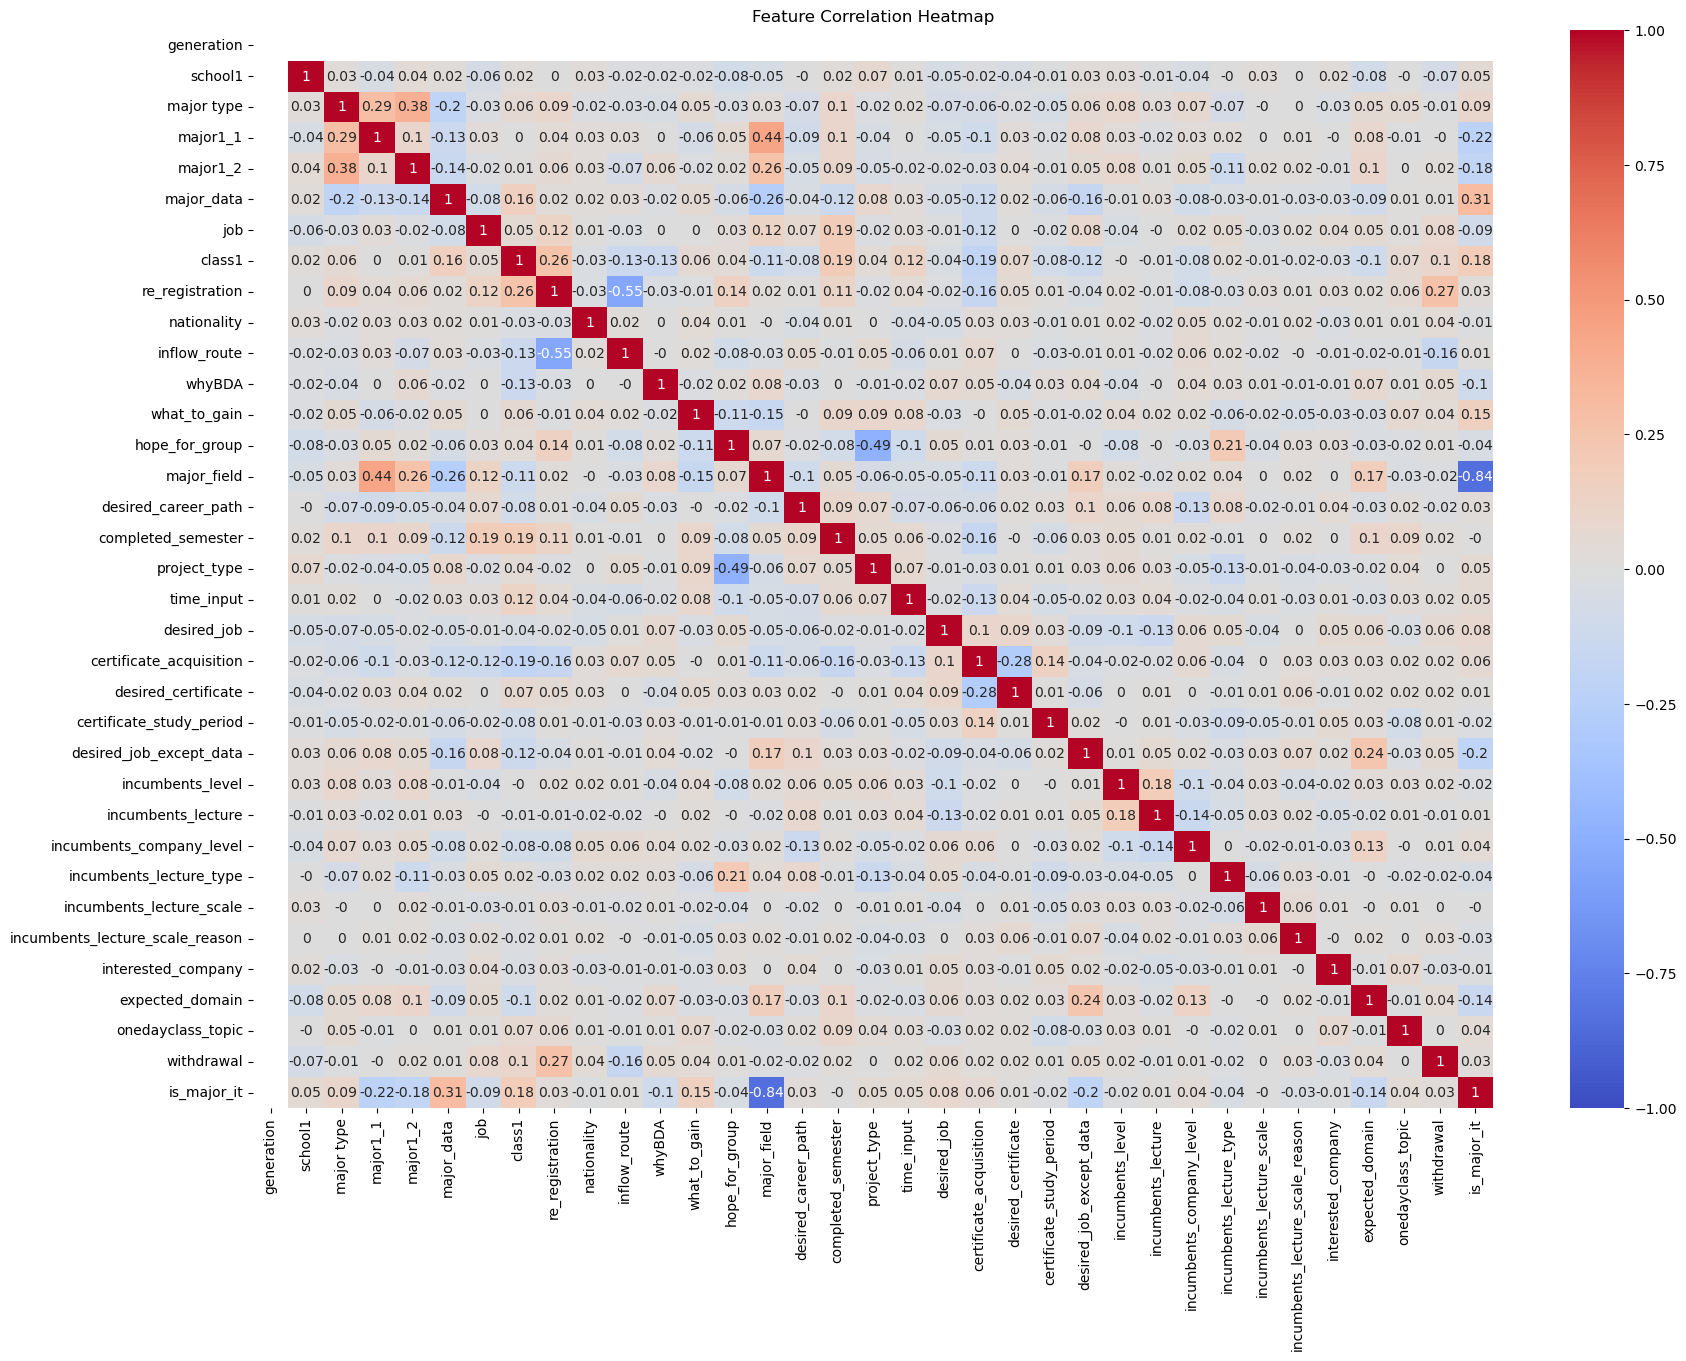

In [9]:
# 'ID' 컬럼 제외 후 상관관계 시각화
corr = train.drop(columns=['ID'], errors='ignore').corr().round(2)

plt.figure(figsize=(20, 14))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

## Feature Selection

In [10]:
X_train = train[['class1', 're_registration', 'inflow_route', 'time_input','is_major_it']]
y_train = train['withdrawal']

X_test = test[['class1', 're_registration', 'inflow_route', 'time_input','is_major_it']]

## Modeling

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Inference

In [12]:
pred = model.predict(X_test)

## Submission

In [13]:
test_pred = model.predict(X_test)

# ID 순서를 바꾸지 않고 그대로 사용
submission = pd.DataFrame({
    'ID': test['ID'], 
    'withdrawal': test_pred
})

submission.to_csv("submission.csv", index=False)

In [14]:
from sklearn.metrics import f1_score

# 전체 train 데이터를 학습에 사용했다면
y_train_pred = model.predict(X_train)

# F1 Score 계산
f1 = f1_score(y_train, y_train_pred)
print("Train F1 Score:", round(f1, 4))

Train F1 Score: 0.851


In [15]:
# submission = pd.read_csv('sample_submission.csv')
# submission['withdrawal'] = pred
# submission.to_csv('submit.csv', index = False)